## Primer Ejercicio

In [2]:
def annograms(word):
  """Esta función recibe una palabra por parámetro, luego abre el archivo WORD.lst
  luego transforma la palabra en una lista de caracteres y la ordena alfabéticamente.
  A Partir de alli se compara cada una de las listas ordenada de cada palabra del archivo WORD.lst con la lista de la palabra parámetro
  Aquellas que son iguales en sus versiones ordenadas y distintas en su forma original con la palabra parámetro, se guardan en una lista que es el retorno de la función
  """
  words = [w.rstrip() for w in open(r'/content/WORD.lst')]
  sorted_word= sorted(word)
  annograms=[]
  for term in words:
    if sorted(term) == sorted_word and term != word:
            annograms.append(term)
  return annograms

if __name__ == "__main__":
  print(annograms("train"))
  print('--')
  print(annograms('drive'))
  print('--')
  print(annograms('python'))

['riant']
--
['diver', 'rived']
--
['phyton', 'typhon']


## Segundo Ejercicio

In [6]:
#Se abre el archivo con la muestra.(Se va a exluir el elemento de la posición 0 al representar el número de objetos de la muestra y no un elemento de la muestra en sí)
with open('/content/c-input.in', 'r') as file:
      content_list = file.readlines()
      content_list = [line.strip() for line in content_list]

In [7]:
def sleep(case_test,N,T):
  check=['0','1','2','3','4','5','6','7','8','9']
  flag = True
  i=0
  N=int(N)
  while flag and i<1000 and N != 0:
    number = (i + 1)*N
    cadena_numero = sorted(str(number))
    check = list(set(check) - set(cadena_numero))

    if not check:
      flag = False
      print("Case #" + str(case_test + 1) + ": " + str(number))

    i = i+1
  if flag:
    print("Case #" + str(case_test + 1) + ": " +': INSOMNIA')
  print("------------------------------------------")


In [8]:
#Esta linea es importante porque la lista de valores no coincide con el ejemplo dado en la consigna del ejercicio.
content_list[5] = 1692

In [14]:
#Aquí inicia la simulación.
if __name__ == "__main__":
  #Se ingresa por consola el número de casos de test, T.
  num_test_cases = int(input("Ingrese el número de tests que quiere realizar: "))
  for j in range(num_test_cases):
    #Se instancia la función sleep
    sleep(j,content_list[1+j],content_list[0])

Ingrese el número de test que quiere realizar: 5
Case #1: : INSOMNIA
------------------------------------------
Case #2: 10
------------------------------------------
Case #3: 90
------------------------------------------
Case #4: 110
------------------------------------------
Case #5: 5076
------------------------------------------


## Tercer Ejercicio

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

Lectura del df

In [18]:
df = pd.read_csv(r'/content/dataset.csv')

Se transforma la columna summary_date a formato datetime

In [ ]:
df['summary_date'] = pd.to_datetime(df['summary_date']).dt.date

Vemos las primeras 2 filas de ejemplo

In [ ]:
df.head(2)

,summary_date,app_id,app_type,app_name,campaign_id,campaign_name,ad_id,ad_name,impressions,clicks,installs,spend,event_name,events_d0,events_d7,unique_events_d0,unique_events_d7
0,2022-06-14,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16L8hGR,Super AD 16L8hGR,82.0,46.0,NaN,0.00455,super_event,NaN,NaN,NaN,NaN
1,2022-07-10,com.super.app,android,Super App 2000,campaign_16,Super campaign 16,ad_16z49oF,Super AD 16z49oF,1942.0,1226.0,2.0,0.88920,super_event,0.0,0.0,0.0,0.0


In [20]:
min_date = df["summary_date"].min()
max_date = df["summary_date"].max()

print("Fecha mas antigua del dataset: " + str(min_date))
# 2023-01-01

print("Fecha mas reciente del dataset: " + str(max_date))
# 2023-03-03

Fecha mas antigua del dataset: 2022.06.01
Fecha mas reciente del dataset: 2022.07.31


### Datos pedidos por la consigna


In [21]:
df_number_impressions = df.groupby('campaign_id')['impressions'].sum()
print(df_number_impressions)

campaign_id
campaign_10            0.0
campaign_13            0.0
campaign_16    245177026.0
campaign_4             0.0
campaign_5             0.0
campaign_6      95681244.0
campaign_9             0.0
Name: impressions, dtype: float64


In [ ]:
df_number_clicks = df.groupby('campaign_id')['clicks'].sum()
print(df_number_clicks)

campaign_id
campaign_10    5429764.0
campaign_13          0.0
campaign_16    2132984.0
campaign_4           0.0
campaign_5           0.0
campaign_6      847818.0
campaign_9           0.0
Name: clicks, dtype: float64


In [ ]:
df_number_installs = df.groupby('campaign_id')['installs'].sum()
print(df_number_installs)

campaign_id
campaign_10    213682.0
campaign_13         2.0
campaign_16     28776.0
campaign_4         26.0
campaign_5       1072.0
campaign_6       3776.0
campaign_9     541224.0
Name: installs, dtype: float64


In [ ]:
df_amount_spend = df.groupby('campaign_id')['spend'].sum()
print(df_amount_spend)

campaign_id
campaign_10    57194.6700
campaign_13        0.0000
campaign_16    18314.5937
campaign_4         0.0000
campaign_5         0.0000
campaign_6      1422.1974
campaign_9         0.0000
Name: spend, dtype: float64


campaign_id
campaign_10         inf
campaign_13         NaN
campaign_16    0.008700
campaign_4          NaN
campaign_5          NaN
campaign_6     0.008861
campaign_9          NaN
dtype: float64


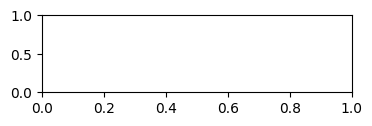

In [ ]:
CTR = df_number_clicks/df_number_impressions
print(CTR)

In [ ]:
CPI = df_amount_spend/df_number_installs
print(CPI)

campaign_id
campaign_10    0.267663
campaign_13    0.000000
campaign_16    0.636454
campaign_4     0.000000
campaign_5     0.000000
campaign_6     0.376641
campaign_9     0.000000
dtype: float64


### EDA

El df tiene esta cantidad de filas:

In [ ]:
df.shape[0]

1570

El df tiene esta cantidad de columnas:

In [ ]:
df.shape[1]

17

Las columnas del df son:

In [ ]:
str(df.columns)

"Index(['summary_date', 'app_id', 'app_type', 'app_name', 'campaign_id',\n       'campaign_name', 'ad_id', 'ad_name', 'impressions', 'clicks',\n       'installs', 'spend', 'event_name', 'events_d0', 'events_d7',\n       'unique_events_d0', 'unique_events_d7'],\n      dtype='object')"

Revisión de duplicados

In [ ]:
duplicated_columns = df[df.duplicated(['summary_date','campaign_id','ad_id'])]
print(duplicated_columns)

Empty DataFrame
Columns: [summary_date, app_id, app_type, app_name, campaign_id, campaign_name, ad_id, ad_name, impressions, clicks, installs, spend, event_name, events_d0, events_d7, unique_events_d0, unique_events_d7]
Index: []


Algunas metricas rapidas.

In [ ]:
df.describe()

,impressions,clicks,installs,spend,events_d0,events_d7,unique_events_d0,unique_events_d7
count,1.489000e+03,1.489000e+03,826.000000,1489.000000,826.000000,826.000000,826.000000,826.000000
mean,2.289176e+05,5.648466e+03,954.670702,51.666529,4.322034,5.491525,3.573850,4.210654
std,6.223744e+05,4.006779e+04,5317.702577,294.343442,10.845378,14.054200,8.846297,10.448334
min,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.800000e+01,6.000000e+00,4.000000,0.011700,0.000000,0.000000,0.000000,0.000000
50%,4.984000e+03,9.000000e+01,12.000000,0.689650,0.000000,0.000000,0.000000,0.000000
75%,7.424400e+04,1.288000e+03,42.000000,9.286550,2.000000,4.000000,2.000000,2.000000
max,5.825656e+06,1.215918e+06,83240.000000,4803.045000,82.000000,116.000000,58.000000,68.000000


In [ ]:
df_number_installs = df.groupby(['campaign_id','ad_id'])['installs'].sum()
print(df_number_installs)

campaign_id  ad_id     
campaign_13  ad_13             2.0
campaign_16  ad_160KfFb      490.0
             ad_1613Cm3        8.0
             ad_161PGNX     1598.0
             ad_162VcYT      156.0
             ad_164s39k      248.0
             ad_1658MjI       12.0
             ad_165Ir4s       12.0
             ad_167wQ9K        4.0
             ad_1690b1k     1072.0
             ad_16DJ04Y     4358.0
             ad_16DpJ5e        0.0
             ad_16FGWaT      438.0
             ad_16HYgnd        0.0
             ad_16J5S8q        0.0
             ad_16L8hGR       18.0
             ad_16Mvrvm       68.0
             ad_16N7JOH     2082.0
             ad_16OvRBM       64.0
             ad_16Qnvp6       24.0
             ad_16RnymO     1380.0
             ad_16SmxpJ       70.0
             ad_16SzuCz        0.0
             ad_16TRY90        6.0
             ad_16TbuLA      126.0
             ad_16UB6lQ       40.0
             ad_16V95hg        0.0
             ad_16VAIpg      33

## Cuarto Ejercicio

### Extracción

Primero, lo más importante a saber es que al ser las 2 plataformas de un mismo ecosistema, será sencillo conectar Google Analytics con BigQuery sin usar ninguna herramienta externa.


El primer paso es tener una cuenta de google registrada en
https://analytics.google.com/

A su vez es necesario tener una Property que indica la pagina de nuestra propiedad,desde donde vamos a extraer los movimientos de los clientes tales como *sessions, pageviews, users,
bounce_rate, conversion_rate,etc*.

Vamos a suponer que ya estan realizados las vistas con los datos que queremos tomar de metricas.

A continuacion, para poder conectar bigquery con GA, debemos hacer uso de PRODUCT LINKS, y seleccionar la opcion de bigquery.

Dentro de la misma, es importante seleccionar el proyecto que deberiamos haber creado anteriormente en la plataforma de bigquery.

Para todo esto es importante haber habilitado la api de google ads desde la Google Cloud Console.

Bigquery funcionará como datalake con los datos raw de google ads
y finalmente como el datawarehouse luego de haber realizado todas las transformaciones en dbt.

###Data Modeling



Para realizar esta parte, haremos uso de DBT cloud aunque se podria utilizar el servicio gratuito de DBT core.

Es necesario  realizar  la conexion con bigquery para que se utilice como motor de base de datos.
https://docs.getdbt.com/docs/cloud/connect-data-platform/connect-bigquery

Una vez conectado dbt cloud con bigquery, creamos el dbt_project.yml de la siguiente manera:

"


```
name: 'google ads'
version: '1.0.0'
config-version: 2

 This setting configures which "profile" dbt uses for this project.
profile: 'bigquery'

 These configurations specify where dbt should look for different types of files.
 The `source-paths` config, for example, states that models in this project can be
 found in the "models/" directory. You probably won't need to change these!
model-paths: ["models"]
analysis-paths: ["analysis"]
test-paths: ["tests"]
seed-paths: ["data"]
macro-paths: ["macros"]
snapshot-paths: ["snapshots"]

target-path: "target"  # directory which will store compiled SQL files
clean-targets:         # directories to be removed by `dbt clean`
    - "target"
    - "dbt_modules"
    - "logs"


  
models:
  +materialized: table
  +table_type: hive
  +format: parquet
  google ads:
    staging:
      +schema: datalake_ads
      +tags: "datalake"
      news_entities:
        +materialized: view
    intermediate:
      +schema: datalake_ads
      +materialized: view
      +tags: "datalake"
    mart:
      +schema: dw_ads
      +tags: "dw"
```


      
"

A su vez, será necesario contar con un archivo de tipo yml que podemos nombrar como src_google_ads donde se realizara el mapeo con la tabla fuente que se encuentra en BigQuery.

la referencia a la tabla/s fuente se realiza de la siguiente manera:



```
version: 2

sources:
    - name: "nombre que tendran las fuentes que provienen del loader"
      loader: "nombre del loader, puede utilizarse uno representativo de la forma de carga"
      description: "se agrega una descripcion al loader"
      schema: datalake
      tables:
        - name: "nombre de la tabla en BigQuery"

```



En la carpeta de **staging**:

  Se haran pequeñas modificaciones, como casteos de valores y renombrado de columnas. el tipo de materializacion sera
VIEW al igual que en la carpeta de Intermediate.

En la carpeta **Intermediate**:

Se haran los joins de las tablas que se necesiten incluir en el modelo y van a seguir la logica de negocio definida con los clientes de los reportes.

En la carpeta **mart**:

La materializacion sera de tipo incremental con el objetivo de bajar la cantidad de procesamiento cada vez que se ingresa nuevos datos. Este incremento tendra como valor clave la columna 'week_start_date'.

Puede evaluarse la necesidad de crear una capa de snapshots para conservar la historia de las dimensiones lentamente cambiantes o de tipo 2.

*Tambien seria posible incluir test genericos provistos por el package "dbt.utils" para validar que los datos ingestados son integros.*


Para el caso de "design a table to store the week-over-week report data"
va a ser un modelo en dbt en la capa de intermediate con el siguiente formato:

```
{{ config(
    materialized='incremental',
    partition_by=['week_start_date'],
    file_format='parquet'
) }}


WITH campaigns AS (
    SELECT
        week_start_date,
        sessions, pageviews,
        users,
        bounce_rate,
        conversion_rate, etc.
    FROM {{ref('stg_google_ads')}}
```



### Automatización

Para la parte de automatizacion del pipeline, hay 2 cosas a tener en cuenta:

Se seleccionara la opción "daily" en la frecuencia de vinculacion de google ads y bigquery, por lo tanto 1 vez al dia se trasladaran los datos desde google ads hacia nuestro datalake en bigquery.

Por otro lado, el proceso de modelado de datos estara a cargo de un Job scheduler que se va a repetir cada una semana

### Reporteria en tableros

Finalmente, las tablas finales se dispondran en formato dashboard para los usuarios finales de los datos en power bi
Para el caso de la conexion al tablero, power bi dispone de un tutorial sencillo `https://learn.microsoft.com/en-us/power-query/connectors/google-bigquery`